In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve

from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet


In [2]:

data = pd.read_csv('/content/boston housing.csv')
num_columns = data.shape[1]
data.columns = [f"feature {i+1}" for i in range(num_columns)]

print("Shape:", data.shape)
print("Columns:", data.columns)
data.head()


Shape: (505, 105)
Columns: Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'feature 6', 'feature 7', 'feature 8', 'feature 9', 'feature 10',
       ...
       'feature 96', 'feature 97', 'feature 98', 'feature 99', 'feature 100',
       'feature 101', 'feature 102', 'feature 103', 'feature 104',
       'feature 105'],
      dtype='object', length=105)


,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,...,feature 96,feature 97,feature 98,feature 99,feature 100,feature 101,feature 102,feature 103,feature 104,feature 105
0,0.000236,0.0,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808,21.6
1,0.000236,0.0,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028,34.7
2,0.000293,0.0,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115,33.4
3,0.000705,0.0,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868,36.2
4,0.000264,0.0,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,...,0.043345,0.066326,0.006414,0.421118,0.644387,0.062315,0.986029,0.095353,0.009221,28.7


In [3]:
# Handle nulls and duplicates
data = data.dropna().drop_duplicates()

# Encode categorical columns
for col in data.select_dtypes(include='object'):
    data[col] = LabelEncoder().fit_transform(data[col])

# Scale numeric features
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


In [4]:
x = data.iloc[:, : -1]
y = data.iloc[:, -1]


In [5]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.105, random_state=80)

In [7]:
# Linear
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred_lin = lin_model.predict(x_test)

# Polynomial
poly_model = make_pipeline(PolynomialFeatures(1), LinearRegression())
poly_model.fit(x_train, y_train)
y_pred_poly = poly_model.predict(x_test)


In [8]:
y_train_pred = poly_model.predict(x_train)
y_test_pred = poly_model.predict(x_test)

In [9]:


print("\nPolynomial Regression:")
print(f"Degree: {1}")
print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Test R² Score:", r2_score(y_test, y_test_pred))

print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))



Polynomial Regression:
Degree: 1
Train R² Score: 0.9324534856195255
Test R² Score: 0.8223423241801856
MSE: 0.13160564902757532
MAE: 0.24472140155092775
RMSE: 0.36277492888508067


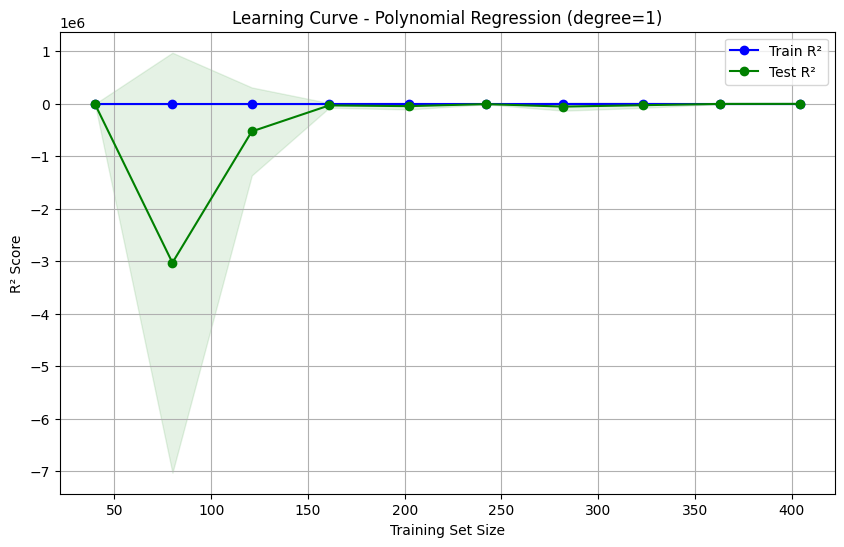

In [10]:

train_sizes, train_scores, test_scores = learning_curve(
    poly_model, x, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), random_state=80
)

# Calculate mean and std for plotting
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Train R²')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')

plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Test R²')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='green')

plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve - Polynomial Regression (degree=1)")
plt.legend(loc='best')
plt.grid()
plt.show()


In [11]:
# Step 3: Ridge, Lasso, ElasticNet
# -----------------------

ridge = make_pipeline(PolynomialFeatures(degree=1), Ridge(alpha=0.111))
lasso = make_pipeline(PolynomialFeatures(degree=1), Lasso(alpha=0.01, max_iter=10000))
elastic = make_pipeline(PolynomialFeatures(degree=1), ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000))


ridge.fit(x_train, y_train)
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)
print("\n🔴 Ridge Regression")
print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Test R² Score :", r2_score(y_test, y_test_pred))

lasso.fit(x_train, y_train)
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)
print("\n🟢 Lasso Regression")
print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Test R² Score :", r2_score(y_test, y_test_pred))

elastic.fit(x_train, y_train)
y_train_pred = elastic.predict(x_train)
y_test_pred = elastic.predict(x_test)
print("\n🟣 ElasticNet Regression")
print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Test R² Score :", r2_score(y_test, y_test_pred))



🔴 Ridge Regression
Train R² Score: 0.9292632814720547
Test R² Score : 0.8402797723539368

🟢 Lasso Regression
Train R² Score: 0.8635392571874143
Test R² Score : 0.7120867237943006

🟣 ElasticNet Regression
Train R² Score: 0.8837136976140991
Test R² Score : 0.7578061571673921


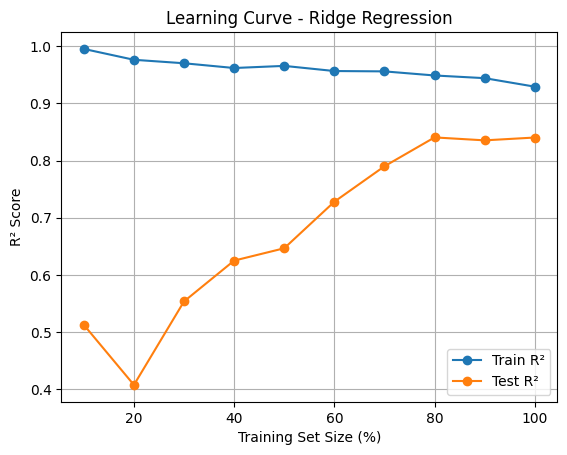

In [12]:


train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
test_scores = []

for size in train_sizes:
    n_train = int(size * len(x_train))
    model = Ridge(alpha=0.111)
    model.fit(x_train[:n_train], y_train[:n_train])

    y_train_pred = model.predict(x_train[:n_train])
    y_test_pred = model.predict(x_test)

    train_scores.append(r2_score(y_train[:n_train], y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))

plt.plot(train_sizes * 100, train_scores, marker='o', label='Train R²')
plt.plot(train_sizes * 100, test_scores, marker='o', label='Test R²')
plt.xlabel('Training Set Size (%)')
plt.ylabel('R² Score')
plt.title('Learning Curve - Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()


In [13]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

In [14]:
def build_model(input_dim, use_l2=False, dropout_rate=0.2):
    regularizer = tf.keras.regularizers.l2(0.001) if use_l2 else None

    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(input_dim,)))
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizer))

    if dropout_rate:
        model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.Dense(1))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model


In [18]:
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import Callback

class R2Callback(Callback):
    def __init__(self, x_train, y_train, x_val, y_val):
        super().__init__()
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.train_r2 = []
        self.val_r2 = []

    def on_epoch_end(self, epoch, logs=None):
        train_pred = self.model.predict(self.x_train, verbose=0).flatten()
        val_pred = self.model.predict(self.x_val, verbose=0).flatten()
        self.train_r2.append(r2_score(self.y_train, train_pred))
        self.val_r2.append(r2_score(self.y_val, val_pred))


In [19]:
r2_callback = R2Callback(x_train_nn, y_train_nn, x_test_nn, y_test_nn)

history = model.fit(
    x_train_nn, y_train_nn,
    validation_data=(x_test_nn, y_test_nn),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, r2_callback],
    verbose=0
)


In [20]:
y_train_pred = model.predict(x_train_nn).flatten()
y_test_pred = model.predict(x_test_nn).flatten()

print("\n🔎 Final Evaluation (Dense NN)")
print("Train R² Score:", r2_score(y_train_nn, y_train_pred))
print("Test R² Score :", r2_score(y_test_nn, y_test_pred))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

🔎 Final Evaluation (Dense NN)
Train R² Score: 0.9726195526507131
Test R² Score : 0.9428164925861305


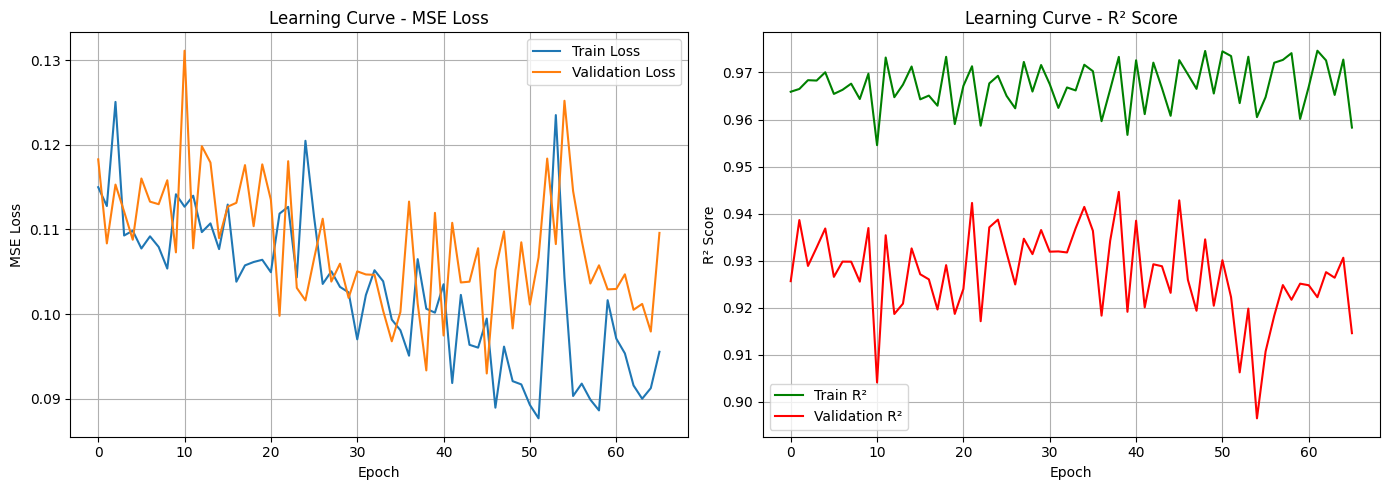

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# MSE Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Learning Curve - MSE Loss")
plt.legend()
plt.grid(True)

# R² Score plot
plt.subplot(1, 2, 2)
plt.plot(r2_callback.train_r2, label='Train R²', color='green')
plt.plot(r2_callback.val_r2, label='Validation R²', color='red')
plt.xlabel("Epoch")
plt.ylabel("R² Score")
plt.title("Learning Curve - R² Score")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
